## Review

Your final project will be reviewed by your team leader, Arina.

You can find my comments in colored markdown cells:

<div class="alert alert-success">
    If a section is accepted.
</div>

<div class="alert alert-warning">
    If I have some suggestions or general comments. The section can still be accepted.
</div>

<div class="alert alert-danger">
    If the section requires some corrections. The decomposition won't be accepted with red comments.
</div>

## Assess Sales Outlets' Performance

### Step 1. Open the data file and study the general information

In [45]:
##### Import default libraries
try:
    import pandas as pd
    import numpy as np
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    from scipy import stats as st
    import math
    import matplotlib.dates as mdates
    import datetime 
    import math
    import plotly.express as px
  
    
except:
    print("An exception occurred")

In [46]:
#read data from file
retail_df = pd.read_csv('/datasets/retail_dataset_us.csv')

# study general information 
retail_df.info()
retail_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         105335 non-null object
item_ID            105335 non-null object
Quantity           105335 non-null int64
purchasedate       105335 non-null object
CustomerID         69125 non-null float64
loyalty_program    105335 non-null int64
ShopID             105335 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
5,538379,22965,0,2016-12-12 11:26:00,22805.0,1,Shop 20
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0
7,541424,79321,1,2017-01-17 17:57:00,NaN,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0
9,539501,22372,0,2016-12-20 11:08:00,22764.0,1,Shop 1


In [47]:
#read data from file
product_df = pd.read_csv('/datasets/product_codes_us.csv', sep = ';')

# study general information 
product_df.info()
product_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
productID        3159 non-null object
price_per_one    3159 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42
5,10124G,0.42
6,10125,0.42
7,10133,0.42
8,10135,0.42
9,11001,1.69


#### Conclusion:
We checked the general information of 'retail_df' and 'product_df' datasets. Upon checking data, we found that the datasets are much cleaner. We didn't find any big issues and discrepancies. However, there are minor issues like column names have capital letters (upper and lower case combination) and need to be renamed for consistency
- columns like 'purchase_date' need to changed to date type
- 'customer_id' need to changed to int type
- There are missing values in 'CustomerID'



<div class="alert alert-success">
    +
</div>

## Step 2: Prepare the data for Analysis
In this step, we are viewing the data in more detail to convert them to the necessary types. Find and eliminate errors in the data

- Replace the column names (make them lowercase)
- Convert the data to the required types
- Checking missing values and duplicates


In [48]:
# renaming columns

retail_df = retail_df.rename(columns={'purchaseid': 'purchase_id', 
                                      'item_ID':'product_id', 
                                      'Quantity':'quantity',
                                      'purchasedate':'purchase_date',
                                      'CustomerID':'customer_id', 
                                      'ShopID':'shop_id'})
product_df = product_df.rename(columns={'productID': 'product_id', 
                                        'price_per_one':'price_per_product'})

In [49]:
# convert dates to datetime objects, only date should remain

retail_df['purchase_date'] =  pd.to_datetime(retail_df['purchase_date']).dt.date

# Splitting Date and create new columns (Day, Month, and Year)
retail_df['day']= pd.DatetimeIndex(retail_df['purchase_date']).day
retail_df['month'] = pd.DatetimeIndex(retail_df['purchase_date']).month
retail_df['year'] = pd.DatetimeIndex(retail_df['purchase_date']).year


In [ ]:
#converting float data numbers into int type

#retail_df['customer_id'] = retail_df['customer_id'].astype(float).astype('Int32')
#retail_df['purchase_id'] = retail_df['purchase_id'].astype('int64')
#product_df['price_per_product'] = product_df['price_per_product'].astype('Int')

In [50]:
# Checking for any duplicate rows
print(retail_df.duplicated().sum())
print(product_df.duplicated().sum())

1034
0


In [51]:
# Dropping any duplicates in the dataset

retail_df.drop_duplicates(inplace=True)

In [52]:
# checking if there are any null/blank columns

total = retail_df.isnull().sum().sort_values(ascending=False)
percent =total/len(retail_df)*100
pd.concat([total,percent], axis=1, keys=['Total','Percent']).head(8)

,Total,Percent
customer_id,36147,34.656427
year,0,0.000000
month,0,0.000000
day,0,0.000000
shop_id,0,0.000000
loyalty_program,0,0.000000
purchase_date,0,0.000000
quantity,0,0.000000


In [54]:
# checking if blank customer_ids are part of loyalty program or not
filterdf  = retail_df[(retail_df['customer_id'].isnull()) & (retail_df['loyalty_program'] == 1)]
display(filterdf)

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,day,month,year


Based on the check above, we can conclude that Customers with blank customerids are those who weren't part of the loyalty program. So, we can customers who are not part of the loyalty program will have null/blank customer_ids.

In [55]:
# Merging retail and product datasets

retail_detail = pd.merge(retail_df, product_df, on='product_id')

retail_detail['purchase_amount'] = retail_detail['quantity'] * retail_detail['price_per_product']

display(retail_detail)

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,day,month,year,price_per_product,purchase_amount
0,538280,21873,11,2016-12-10,18427.0,0,Shop 3,10,12,2016,0.42,4.62
1,541104,21873,0,2017-01-13,NaN,0,Shop 0,13,1,2017,0.42,0.00
2,540418,21873,1,2017-01-07,NaN,0,Shop 0,7,1,2017,0.42,0.42
3,541516,21873,2,2017-01-18,NaN,0,Shop 0,18,1,2017,0.42,0.84
4,541566,21873,35,2017-01-19,23401.0,1,Shop 22,19,1,2017,0.42,14.70
...,...,...,...,...,...,...,...,...,...,...,...,...
104296,538852,90058B,35,2016-12-14,23051.0,1,Shop 8,14,12,2016,0.38,13.30
104297,539988,46138B,1,2016-12-23,23795.0,1,Shop 14,23,12,2016,1.95,1.95
104298,537025,90053,0,2016-12-03,NaN,0,Shop 0,3,12,2016,2.55,0.00
104299,542731,17028J,5,2017-01-31,19279.0,0,Shop 0,31,1,2017,0.42,2.10


Combined the two datasets and calculated purchase_amount for each customer's purchase.

In [56]:
# Checking id there are any negative quantity 

retail_detail_check = retail_detail[retail_detail['quantity']< 0]
retail_detail_check

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,day,month,year,price_per_product,purchase_amount
49,C542537,22195,-2,2017-01-28,18180.0,0,Shop 14,28,1,2017,1.65,-3.30
345,C540250,79321,-2,2017-01-05,23190.0,1,Shop 7,5,1,2017,0.00,-0.00
442,C540417,79321,-73,2017-01-07,19359.0,0,Shop 9,7,1,2017,0.00,-0.00
670,C542078,22189,-2,2017-01-25,18533.0,0,Shop 7,25,1,2017,2.31,-4.62
727,C542792,22891,-2,2017-02-01,20306.0,0,Shop 14,1,2,2017,3.75,-7.50
...,...,...,...,...,...,...,...,...,...,...,...,...
104275,545219,20738,-37,2017-02-28,NaN,0,Shop 0,28,2,2017,0.00,-0.00
104282,C544653,85065,-2,2017-02-22,18792.0,0,Shop 3,22,2,2017,12.75,-25.50
104284,542556,22143,-2,2017-01-28,NaN,0,Shop 0,28,1,2017,0.00,-0.00
104295,540560,21589,-15,2017-01-10,NaN,0,Shop 0,10,1,2017,0.00,-0.00


The number of quantities that a customer would buy can never be negative. However, upon checking we found out that there are few negative quantities in the datasets. That couldn't be some technical issues while entering the data and system error.

In [57]:
# dropping rows that have negative quantity

retail_detail.drop(retail_detail[retail_detail.quantity < 0].index, inplace=True)
#print(retail_df)


<div class="alert alert-success">
    Valid logic! Another possible reason - the negative quantities might mean returns.
</div>

In [423]:

#retail_detail[retail_detail.purchase_id=='C540250']
#retail_df[retail_df.quantity >0']

,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,day,month,year,price_per_product,purchase_amount


In [58]:
#converting float data numbers into int type

retail_detail['customer_id'] = retail_detail['customer_id'].astype('float').astype('Int64')
retail_detail['purchase_id'] = retail_detail['purchase_id'].astype('float').astype('Int64')
#product_df['price_per_product'] = product_df['price_per_product'].astype('Int64')


#### Conclusion:
- We changed renamed the column names.
- We converted the datatypes of 'purchase_date', 'customer_id' columns
- We deleted 1033 duplicate records. 
- There are  36,148 missing values in the 'customer_id' column. Upon checking we found out that those are customers who weren't enrolled in the loyalty program. Hence their customer_id are blank. So they weren't missing values apparently.
- We also found out that there are 2076 records in the quantity column that are negative. This couldn't be an error in the system. Since this is just 1 % of the data, we are not taking any action on these negative quantities. we simply dropped these rows to get precise information from the datasets above.



<div class="alert alert-success">
    Nice data preprocessing!
</div>

### Step 3: Analyze the data

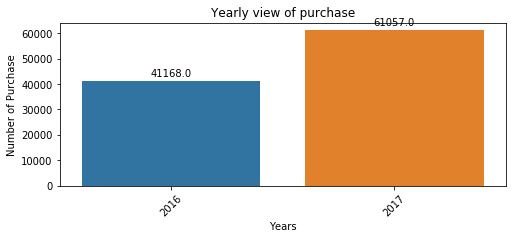

In [59]:
# Determine the number of purchases by year. 

purchase_per_year = retail_detail.groupby('year').agg({'purchase_id':'count'}).reset_index().sort_values(by='purchase_id', ascending=False)

# plot bar graph
plt.figure(figsize=(8, 3))
ax = sns.barplot(data = purchase_per_year, x='year', y='purchase_id')

# Add titles and captions
plt.xlabel("Years")
plt.ylabel("Number of Purchase")
plt.title("Yearly view of purchase");

# label bars with data
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')
    
# rotate x axis labels
for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.show()


,purchase_date,purchase_id
67,2017-02-28,1714
66,2017-02-27,784
65,2017-02-25,969
64,2017-02-24,1265
63,2017-02-23,1569
62,2017-02-22,1562
61,2017-02-21,1362
60,2017-02-20,823
59,2017-02-18,815
58,2017-02-17,1710


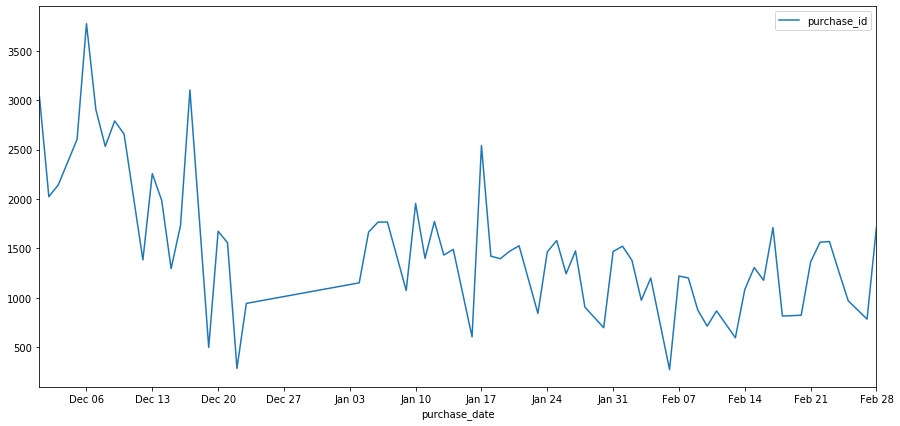

In [60]:
# Determine the number of purchases by date. 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

purchase_per_date = retail_detail.groupby('purchase_date').agg({'purchase_id':'count'}).reset_index().sort_values(by='purchase_date', ascending=False)
display(purchase_per_date.head(10))
#set date as index
purchase_per_date.set_index('purchase_date',inplace=True)

#plot data
fig, ax = plt.subplots(figsize=(15,7))
purchase_per_date.plot(ax=ax)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

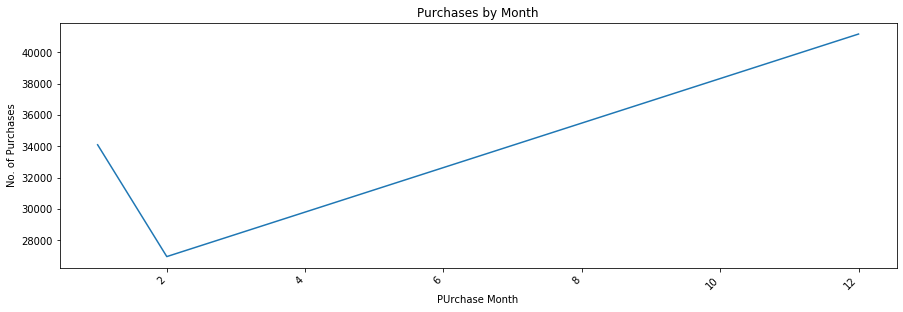

In [18]:
# Determine the number of purchases by month. 

purchase_per_month = retail_detail.groupby('month').agg({'purchase_id':'count'}).reset_index().sort_values(by='month', ascending=False)
fig, ax = plt.subplots(figsize = (15,5))  
ax.plot(purchase_per_month['month'],purchase_per_month['purchase_id'])
plt.gcf().autofmt_xdate(rotation=45)
plt.title('Purchases by Month')
plt.ylabel('No. of Purchases')
plt.xlabel('PUrchase Month')
plt.show()

,year,loyalty_program,purchase_id
2,2017,0,47677
3,2017,1,13380
0,2016,0,31575
1,2016,1,9593


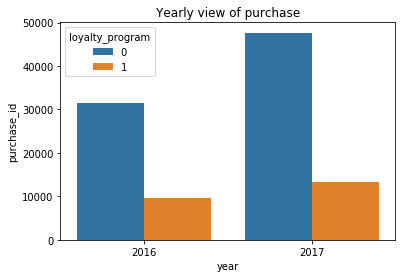

In [61]:
# breakdown by loyalty_program

purchase_per_year_loyalty = retail_detail.groupby(['year','loyalty_program']).agg({'purchase_id':'count'}).reset_index().sort_values(by='year', ascending=False)
display(purchase_per_year_loyalty)
# Add titles and captions
plt.xlabel("Years")
plt.ylabel("Number of Purchase")
plt.title("Yearly view of purchase");
sns.barplot(x ="year", y = 'purchase_id', data = purchase_per_year_loyalty, hue = "loyalty_program")
plt.show()

#### Conclusion:
Based on the plotting above, we can conclude that the number of purchases in the year 2017 is more than the year 2016.
However, based on the breakdown plotting, customers without a loyalty program purchased more than those who have a loyalty program. Let's do some more investigation why this is the case. 



<div class="alert alert-warning">
    Looking OK, but I would check what data range we have. E.g. there's a chance that we only have, say, three-month data for 2016 and full-year data for 2017, which would explain the difference in the number of purchases. Also, it would be interesting to see purchase breakdown by month.
</div>

In [62]:
#Determine the number of purchases by year breakdown by storeIds 

purchase_per_year_perstore = retail_detail.groupby(['year','shop_id']).agg({'purchase_id':'count'}).reset_index().sort_values(by='purchase_id', ascending=False)
display(purchase_per_year_perstore)

#purchase_per_year_perstore = retail_detail.groupby(['year','shop_id','loyalty_program']).agg({'purchase_id':'count'}).reset_index().sort_values(by='purchase_id', ascending=False)
#display(purchase_per_year_perstore)



,year,shop_id,purchase_id
31,2017,Shop 0,21666
0,2016,Shop 0,16289
32,2017,Shop 1,1908
46,2017,Shop 22,1696
48,2017,Shop 24,1681
...,...,...,...
9,2016,Shop 17,617
14,2016,Shop 21,612
23,2016,Shop 3,556
25,2016,Shop 4,490


#### Conclusion:
Based on the table above, we can say that 'Shop 0' is the most popular one for both year 2016 and 2017 as it has the highest number of purchases.

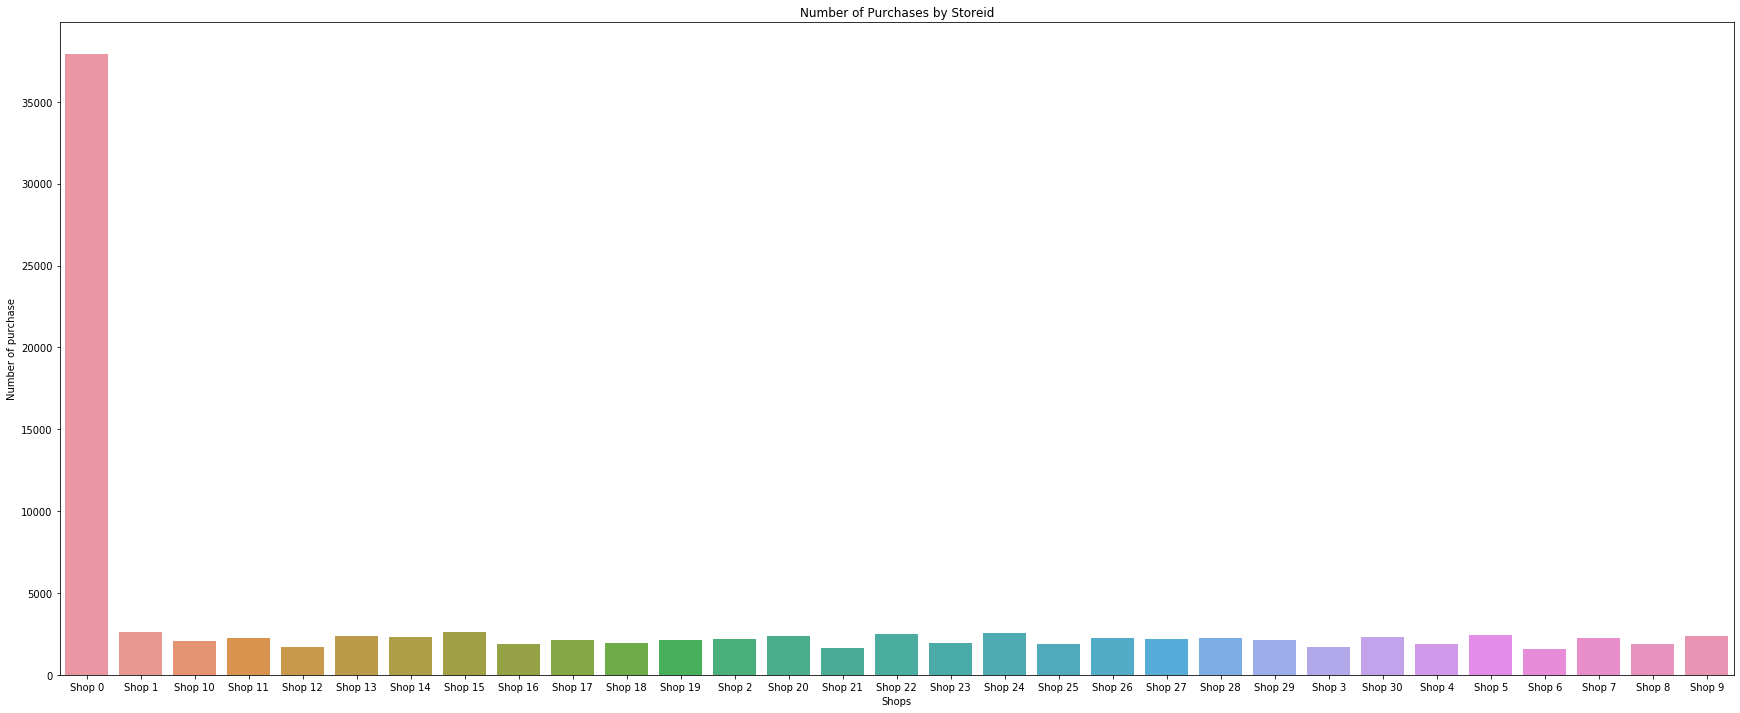

In [63]:
#Determine the number of purchases breakdown by storeID. 
#Plot bar diagram showing the number of purchases by storeID

purchase_per_year = retail_detail.groupby('shop_id')['purchase_id'].count().reset_index()


# Figure Size
#purchase_per_year.groupby("shop_id")[["purchase_id"]].sum().plot(kind='bar',legend=False)
fig, ax = plt.subplots()
fig.set_size_inches(30,12)
sns.barplot(x=purchase_per_year.shop_id, y='purchase_id'
            , data=purchase_per_year
            , ax=ax
            , capsize=10)
plt.xlabel("Shops")
plt.ylabel("Number of purchase")
plt.title("Number of Purchases by Storeid");
plt.show()

#### Conclusion:
Based on the plotting above, we can conclude that 'shop 0' has distinctively the most highest sales than any other stores.'Shop 0' has 9 times higher sales than any other stores in the outlet. It looks like 'shop 0' is the only store that is bringing in revenue.

<div class="alert alert-success">
    +
</div>

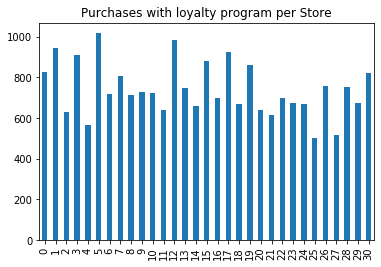

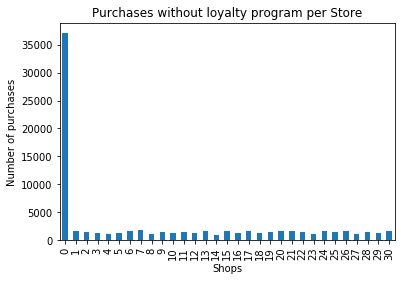

In [36]:
# Breaking down by purchases by loyalty program

#purchase_with_loyalty = retail_detail[retail_detail.loyalty_program == 1]

#purchase_without_loyalty = retail_detail[retail_detail.loyalty_program == 0]

#for plotting
#plot_withloyalty = purchase_with_loyalty.groupby("shop_id")[["purchase_id"]].count().reset_index()
#plot_withloyalty.plot(kind='bar',legend=False)
#plt.title("Purchases with loyalty program per Store")

#plot_withoutloyalty = purchase_without_loyalty.groupby("shop_id")[["purchase_id"]].count().reset_index()
#plot_withoutloyalty.plot(kind='bar',legend=False)
#plt.title("Purchases without loyalty program per Store")

#sns.countplot(x='shop_id', hue='loyalty_program', data=retail_detail)
#plt.xlabel("Shops")
#plt.ylabel("Number of purchases")
#plt.show()

,shop_id,purchase_id,purchase%
0,Shop 0,827,0.809000
1,Shop 1,946,0.925410
2,Shop 10,632,0.618244
3,Shop 11,913,0.893128
4,Shop 12,565,0.552702


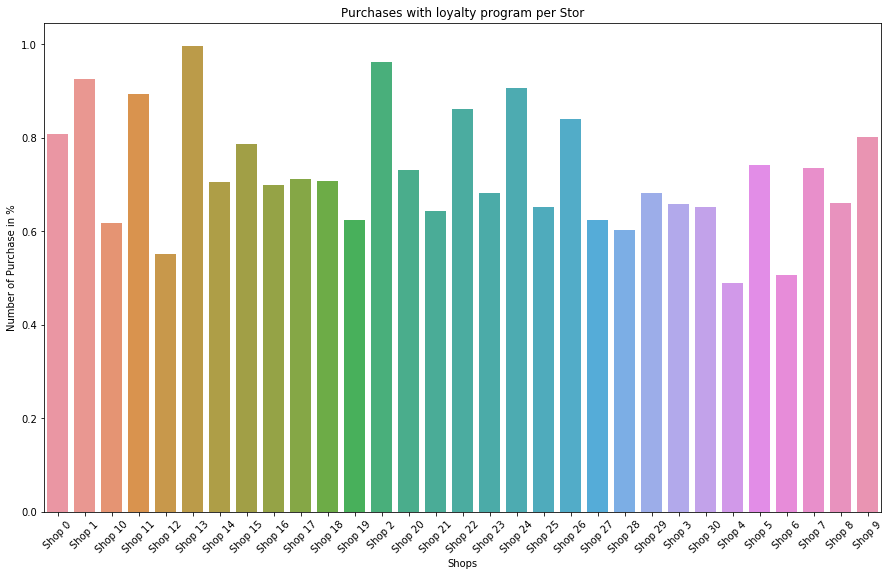

In [64]:
# Breaking down by purchases by loyalty program

purchase_with_loyalty = retail_detail[retail_detail.loyalty_program == 1]

plot_withloyalty['purchase%'] = (plot_withloyalty['purchase_id']/retail_detail.purchase_id.count()) * 100
display(plot_withloyalty.head(5))

# plot bar graph
plt.figure(figsize=(15, 9))
ax = sns.barplot(data = plot_withloyalty, x='shop_id', y='purchase%')

# Add titles and captions
plt.xticks(rotation=45)
plt.title('Purchases with loyalty program per Stor')
plt.xlabel('Shops')
plt.ylabel('Number of Purchase in %')
plt.show()

,shop_id,purchase_id,purchase%
0,Shop 0,37128,36.319883
1,Shop 1,1699,1.662020
2,Shop 10,1461,1.429200
3,Shop 11,1307,1.278552
4,Shop 12,1148,1.123013


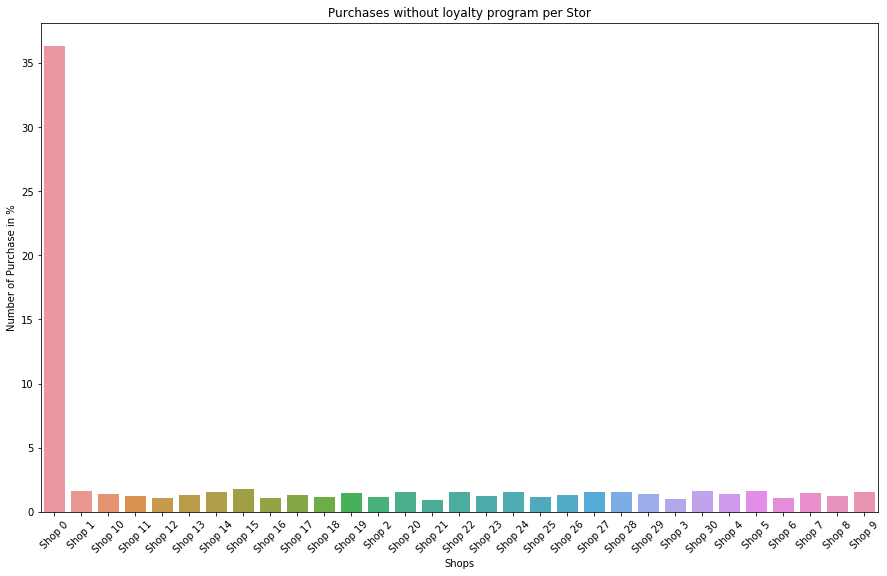

In [65]:
purchase_without_loyalty = retail_detail[retail_detail.loyalty_program == 0]
plot_withoutloyalty['purchase%'] = (plot_withoutloyalty['purchase_id']/retail_detail.purchase_id.count()) * 100
display(plot_withoutloyalty.head(5))

# plot bar graph
plt.figure(figsize=(15, 9))
ax = sns.barplot(data = plot_withoutloyalty, x='shop_id', y='purchase%')

# Add titles and captions
plt.xticks(rotation=45)
plt.title('Purchases without loyalty program per Stor')
plt.xlabel('Shops')
plt.ylabel('Number of Purchase in %')
plt.show()

#### Conclusion:
Based on the plotting above, we can conclude that the trend of purchases changed with customers who  are part of loyalty  program or not. Those customers who  have loyalty program tend to buy almost evenly in each store whereas customers who don't have loyalty program tend to only purchase at one store which is 'shop 0'. The reason could be that the shop 0 could be food or basic requirement store where customers have to go and buy for living no matter there are deals, discounts or not or this  store is already a discounted store like 'Ross' and 'TJMax'.

<div class="alert alert-warning">
    Showing the percentage instead of the absolute numbers would probably be more informative.
</div>

,day,purchase_id
0,1,4558
1,2,3402
2,3,3117
3,4,2351
4,5,4268
5,6,5813
6,7,5890
7,8,3732
8,9,4740
9,10,5323


,month,purchase_id
2,12,41168
1,2,26959
0,1,34098


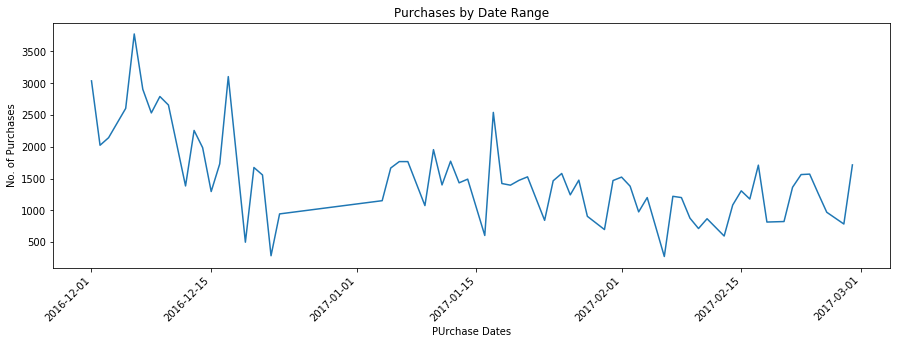

In [66]:
# Breaking down by purchases made in a day.
purchase_per_day = retail_detail.groupby('day').agg({'purchase_id':'count'}).reset_index()
display(purchase_per_day.head(10))

purchase_per_month = retail_detail.groupby('month').agg({'purchase_id':'count'}).reset_index().sort_values(by='month', ascending=False)
display(purchase_per_month.head(10))

purchase_per_date = retail_detail.groupby('purchase_date').agg({'purchase_id':'count'}).reset_index().sort_values(by='purchase_date', ascending=False)
fig, ax = plt.subplots(figsize = (15,5))  
ax.plot(purchase_per_date['purchase_date'],purchase_per_date['purchase_id'])
plt.gcf().autofmt_xdate(rotation=45)
plt.title('Purchases by Date Range')
plt.ylabel('No. of Purchases')
plt.xlabel('PUrchase Dates')
plt.show()

#### Conclusion:
Based on the plotting above, we can conclude that the number of purchases is higher in the middle of a month whereas the number of purchases slowly goes up after February month and is highest in December. It's obviously because major holidays (Thanksgiving and Christmas) are at the end of the year.


<div class="alert alert-warning">
    +; would love to see the dates on x-axis though instead of the day order.
</div>

In [251]:
#Examine how many purchases are made in a day?
# Plot a histogram showing the number of purchases.

#purchase_per_day = retail_detail.groupby(['year','month','day'])['purchase_id'].count().reset_index().sort_values(by='purchase_id', ascending=False)
#purchase_per_day = retail_detail.groupby('purchase_date')['purchase_id'].mean()
#fig = plt.figure(figsize = (100, 50)) 
#purchase_per_year.plot(kind='bar',legend=False)
#plt.xlabel("Days") 
#plt.ylabel("number of purchases")  

# show plot 
#plt.show()


In [67]:
#Examine how many purchases are made per customer? 
#Check if they have loyalty program. 

purchase_percustomer_withoutLoyalty = purchase_without_loyalty.groupby('customer_id')['purchase_id'].count().reset_index().sort_values(by='purchase_id', ascending=False)
display(purchase_percustomer_withoutLoyalty.head(10))

,customer_id,purchase_id
135,18427,772
661,20285,724
850,20990,693
747,20590,506
672,20325,467
233,18768,447
773,20718,426
567,19977,362
230,18760,318
525,19835,307


In [68]:

purchase_percustomer_withLoyalty = purchase_with_loyalty.groupby('customer_id')['purchase_id'].count().reset_index().sort_values(by='purchase_id', ascending=False)
display(purchase_percustomer_withLoyalty.head(10))

,customer_id,purchase_id
435,23520,738
525,23797,318
439,23529,297
427,23490,249
285,23016,244
286,23017,239
340,23190,214
172,22610,196
524,23795,195
370,23290,192


### Conclusion:
Based on the tables above we can conclude that on average the number of purchases per customer is almost the same with or without a loyalty program.
The highest purchase made is around 700 per customer.





In [69]:
#What products is most bought by customers?

product_per_customer = retail_detail.groupby('product_id')['customer_id'].count().reset_index().sort_values(by='customer_id', ascending=False)

display (product_per_customer.head(5))
topstores = retail_detail[retail_detail['product_id'].isin(['85123A'])]
print(sorted(topstores['shop_id'].unique()))

,product_id,customer_id
2653,85123A,491
1272,22423,360
1315,22469,317
1553,22720,307
1316,22470,268


['Shop 0', 'Shop 1', 'Shop 10', 'Shop 11', 'Shop 12', 'Shop 13', 'Shop 14', 'Shop 15', 'Shop 16', 'Shop 17', 'Shop 18', 'Shop 19', 'Shop 2', 'Shop 20', 'Shop 21', 'Shop 22', 'Shop 23', 'Shop 24', 'Shop 25', 'Shop 26', 'Shop 27', 'Shop 28', 'Shop 29', 'Shop 3', 'Shop 30', 'Shop 4', 'Shop 5', 'Shop 6', 'Shop 7', 'Shop 8', 'Shop 9']


### Conclusion:
Based on the tables above we can conclude that the products with '85123A','22423','22469','22720','22470' ids are the most bought products by customers. These products belong to the stores listed above.

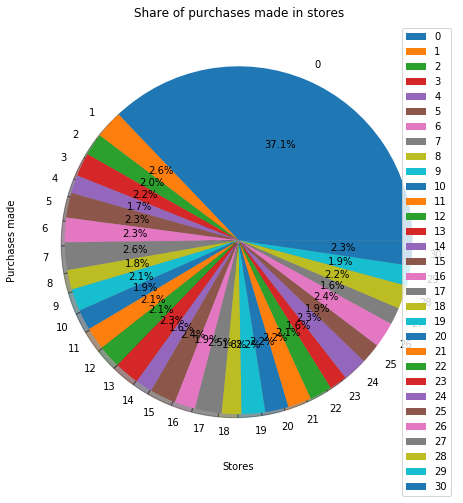

In [70]:
# Determine the share of purchases made in different stores. 
#Plot a pie chart showing the shares of purchases in different stores.

purchase_per_store = retail_detail.groupby('shop_id')['purchase_id'].count().reset_index()

purchase_per_store.plot(kind='pie',y='purchase_id', shadow = True, figsize=(12,8),autopct='%1.1f%%')
plt.title('Share of purchases made in stores')
plt.xlabel("Stores") 
plt.ylabel("Purchases made")  
# show plot 
plt.show() 



Based on the graph above, we can conclude that 36% of purchases are made in 'shop 0' whereas  2-3% purchases are made in the rest of the stores. It looks like half of the customers don't have loyalty programs. However, those who have it purchase evenly in all stores whereas those who don't have it buy mostly in shop0. It looks like the shop0 doesn't have a loyalty_program for customers however, it is still popular among customers.

<div class="alert alert-success">
    +
</div>

In [ ]:
#What time of year is the best to maximize the likelihood of customers' purchases? 

#Check if purchases spike during holidays or any major events (like Thanksgiving, and Christmas).

#Holiday Events:
#Thanksgiving and blackfriday: 24-Nov-16, 25-Nov-16, 26-Nov-16, 27-Nov-16,24-Nov-17, 25-Nov-17, 26-Nov-17, 27-Nov-17

#Christmas and New Year: 24-Dec-16, 25-Dec-16, 30-Dec-16, 31-Dec-16,24-Dec-17, 25-Dec-17, 30-Dec-17, 31-Dec-17

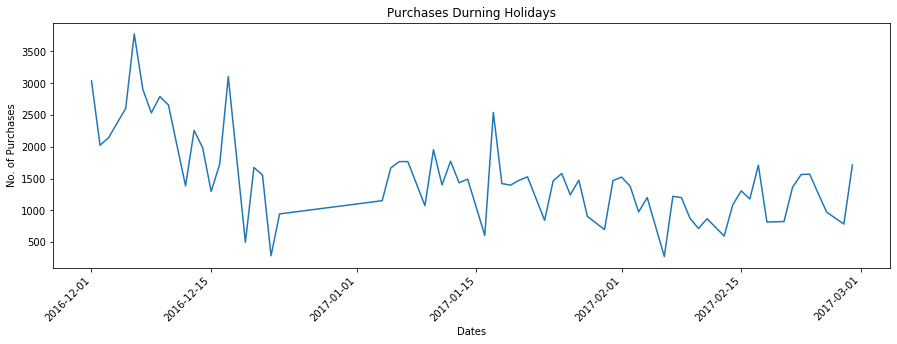

In [71]:

total_sales = retail_detail.groupby('purchase_date')['purchase_id'].count().reset_index()

Thanksgiving  = ['24-11-2016', '25-11-16', '26-11-2016', '27-11-2016','24-11-2016', '25-11-2017', '26-11-2017', '27-11-2017']
Christmas   = ['24-12-2016', '25-12-2016', '30-12-2016', '31-12-2016','24-12-2017', '25-12-2017', '30-12-2017']

  
fig, ax = plt.subplots(figsize = (15,5))  
ax.plot(total_sales['purchase_date'],total_sales['purchase_id'],label=Thanksgiving)
plt.gcf().autofmt_xdate(rotation=45)
plt.title('Purchases Durning Holidays')
plt.ylabel('No. of Purchases')
plt.xlabel('Dates')
plt.show()

#### Conclusion:
Of course, Thanksgiving, Black Friday, Christmas, and New year are the biggest holidays here in the US. These are the best time to maximize the likelihood of customers' purchases. 
Based on the plotting above, we can conclude that purchases do spike during these times. It's probably because customers buy a lot of things during this time for gifts and stores gives huge discounts and deals to make them buy more.


<div class="alert alert-success">
    +
</div>

In [72]:
# How effect is a loyalty program? Do customer with or without loyalty program purchases more or less?
loyalty = retail_detail.groupby('loyalty_program')['purchase_id'].count().reset_index()
loyalty


,loyalty_program,purchase_id
0,0,79252
1,1,22973


### Conclusion:
Based on the tables and plotting above, we can conclude that the number of purchases made by customers is independent of loyalty program membership. In fact, the majority of customers don't even have a loyalty program. It's an additional 20 dollar cost per month. Customers would rather not pay 20 dollars extra and buy more in affordable store like 'shop 0' instead. However, there are some customers who would pay 20 dollars monthly for loyalty membership and buy expensive and quality items in other stores using discounts and promotions. It's  matter of choice depending upon your earnings.

<div class="alert alert-success">
    +
</div>

### Step 4. Test the following hypotheses:
-  Average purchases of customers with loyalty programs are the same as of customers without a loyalty program.

In [73]:
# Test hypothesis:Average purchases of customers with loyalty programs are the same as of customers without a loyalty program

# calculate average
meanpurchase_without_loyalty = purchase_without_loyalty['purchase_id'].mean().round(decimals=2)
meanpurchase_with_loyalty = purchase_with_loyalty['purchase_id'].mean().round(decimals=2)


print('The average purchase of customer with loyalty program is: ' + str(meanpurchase_with_loyalty))
print('The average purchase of customer without loyalty program is: ' + str(meanpurchase_without_loyalty))

# perform a t-test
results = st.ttest_ind(purchase_without_loyalty['purchase_id'], purchase_with_loyalty['purchase_id'], equal_var=False)
p_value = results.pvalue

# critical statistical significance level
alpha = 0.05

print('p-value: ', results.pvalue)

if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')

The average purchase of customer with loyalty program is: 540765.2
The average purchase of customer without loyalty program is: 540753.88
p-value:  0.5704389304882957
We can not reject the null hypothesis


### Conclusion:
We tested the hypothesis that the average purchases of customers with loyalty programs are the same as of customers without a loyalty program.

We started with the null hypothesis which is
H₀ = the average purchases of customers with or without loyalty programs are the same.

The alternative hypothesis which is
H₁ = the average purchases of customers with or without loyalty programs are not the same.

For this, we used an alpha of 0.05, which means that only in 5% of cases will we reject the null hypothesis when it is true.

We used a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another.

This result implies that the average purchases of customers with or without loyalty programs are the same.


<div class="alert alert-success">
    Good analysis here :)
</div>

### Step 5. Prepare a presentation


##### Link to Dashboard (Tableau)

In [ ]:

https://public.tableau.com/app/profile/pranita1207/viz/AssessSalesOutletsPerformance/Dashboard1?publish=yes

<div class="alert alert-success">
    Nice dashboard. One small remark: I wouldn't put three graphs on the right-hand side (maybe would rather rearrange them a bit). It's too much information; in addition, that results in the three graphs not fitting perfectly to the dashboard's height. Other than that, no other issues.
</div>

##### Link to Presentation (pdf)

In [ ]:
https://drive.google.com/file/d/11vXshl-Z7BgzQMljDI2dxwvnyTtuPkpx/view?usp=sharing

<div class="alert alert-danger">
    <s>I cannot access the presentation due to your privacy settings. Please fix this (make it accessible for viewing for those with the link).</s>
</div>

### Overall Conclusion:
    

Based on the assessments we performed on the above Sales Outlets data, we can conclude that that the number of purchases in the year 2017 is more than the year 2016. However, when we break down data by the loyalty program, we found out that, customers without loyalty programs purchased more than those who have loyalty programs. It's probably because taking loyalty program membership is an additional $20 per month. It looks like more than half of the customers don't have a loyalty program membership. For those who don't have loyalty membership, 'shop 0' is the most popular one. We found out based on the numbers above shop0 has the highest number of purchases so far. This store has 10 times more sales than any other store. It looks like the only store that is bringing in overall revenue. It looks like shop 0 is the store like 'TJMax' and 'Ross' where things are already priced decent and get quality things whereas some customers prefer to take membership and get discounts to buy things where they could find more variety and brands.

The best time to purchase, of course, Thanksgiving, Black Friday, Christmas, and New year are the biggest holidays here in the US. These are the best time to maximize the likelihood of customers' purchases. Based on the plotting above, we can conclude that purchases do spike during this time. It's probably because customers buy a lot of things during this time for gifts and stores give huge discounts and deals to make them buy more. We tested the hypothesis that the average purchases of customers with loyalty programs are the same as of customers without a loyalty program. This result implies that the average purchases of customers with or without loyalty programs are the same. Hence, we can conclude that a loyalty program doesn't help boost the performance of the sales outlets. However, there is one store 'shop 0' which is bringing in the most revenue for a building-material retailer called Home World. 

We would recommend all the other stores to adopt business policies and tactics that shop 0 is using so that other stores also can bring in more profit to the Sales Outlets.

<div class="alert alert-success">
    The project is well-structured and coherent. The logic of your analysis is clear, and the choice of methods is justified. Your visualization and hypothesis testing skills are quite strong. I particularly liked the way you conducted the data quality checks and hypothesis testing. Excellent job - this project part is accepted. 
</div>

<div class="alert alert-danger">
    <s>Please include the list of sources you used when working on the project. This is a mandatory part in order to pass the final project. If you already included the list in your presentation (which I am yet to get access to) - disregard this comment then. If it's not in the presentation - please add it here in the notebook.</s>
</div>